In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import starsim as ss

## SEIR Simulator

- Implement basic SEIR model using StarSim
- Plot epidemic curves for 3 different R₀ values (1.2, 2.5, 4.0)
- Calculate peak timing and final attack rate for each scenario


/home/abie/miniforge3/envs/week01-seir/lib/python3.10/site-packages/starsim/time.py:118: FutureWarning: sc.datetoyear() argument "reverse" has been deprecated as of v3.2.1; use sc.yeartodate() instead
  datevec = np.array([date(sc.datetoyear(y, reverse=True)) for y in yearvec])


Initializing sim with 10000 agents
  Running 2000.0 ( 0/51) (0.00 s)  ———————————————————— 2%
  Running 2010.0 (10/51) (0.02 s)  ••••———————————————— 22%
  Running 2020.0 (20/51) (0.04 s)  ••••••••———————————— 41%
  Running 2030.0 (30/51) (0.05 s)  ••••••••••••———————— 61%
  Running 2040.0 (40/51) (0.06 s)  ••••••••••••••••———— 80%
  Running 2050.0 (50/51) (0.08 s)  •••••••••••••••••••• 100%

Figure(800x600)


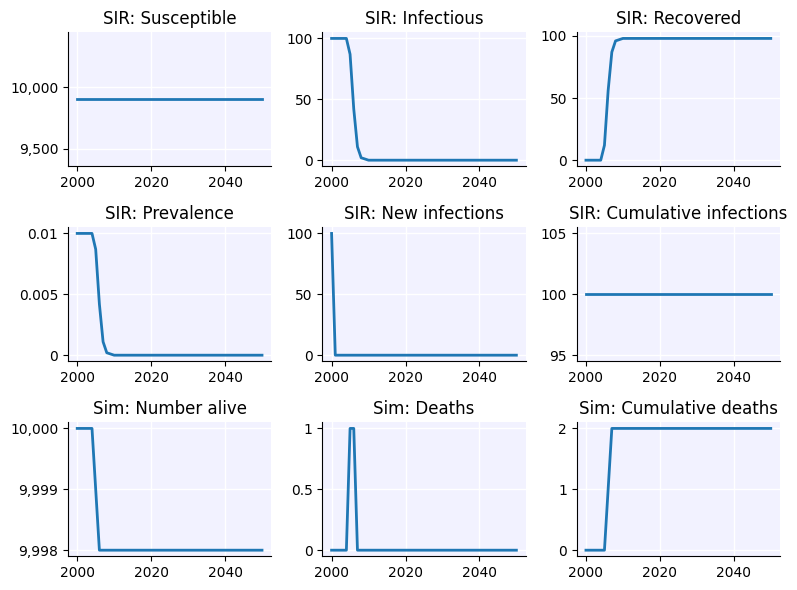

In [2]:
sim = ss.Sim(diseases='sir')
sim.run()
sim.plot()

# StarSim does not have an SEIR model built in

But it does have an example of how to make one as [a developer tutorial](https://docs.idmod.org/projects/starsim/en/stable/tutorials/dev_tut_diseases.html#Making-your-own-disease).

In [3]:
class SEIR(ss.SIR):
    def __init__(self, pars=None, *args, **kwargs):
        super().__init__()
        self.define_pars(
            dur_exp = ss.lognorm_ex(0.5),
        )
        self.update_pars(pars, **kwargs)

        # Additional states beyond the SIR ones
        self.define_states(
            ss.State('exposed', label='Exposed'),
            ss.FloatArr('ti_exposed', label='TIme of exposure'),
        )
        return

    @property
    def infectious(self):
        return self.infected | self.exposed

    def step_state(self):
        """ Make all the updates from the SIR model """
        # Perform SIR updates
        super().step_state()

        # Additional updates: progress exposed -> infected
        infected = self.exposed & (self.ti_infected <= self.ti)
        self.exposed[infected] = False
        self.infected[infected] = True
        return

    def step_die(self, uids):
        super().step_die(uids)
        self.exposed[uids] = False
        return

    def set_prognoses(self, uids, sources=None):
        """ Carry out state changes associated with infection """
        super().set_prognoses(uids, sources)
        ti = self.ti
        self.susceptible[uids] = False
        self.exposed[uids] = True
        self.ti_exposed[uids] = ti

        # Calculate and schedule future outcomes
        dur_exp = self.pars['dur_exp'].rvs(uids)
        self.ti_infected[uids] = ti + dur_exp
        dur_inf = self.pars['dur_inf'].rvs(uids)
        will_die = self.pars['p_death'].rvs(uids)
        self.ti_recovered[uids[~will_die]] = ti + dur_inf[~will_die]
        self.ti_dead[uids[will_die]] = ti + dur_inf[will_die]

        # Update result count of new infections
        self.results['new_infections'][self.ti] += len(uids)
        return

    def plot(self):
        """ Update the plot with the exposed compartment """
        with ss.options.context(jupyter=False):
            fig = super().plot()
            ax = plt.gca()
            res = self.results.n_exposed
            ax.plot(res.timevec, res, label=res.label)
            plt.legend()
        return ss.return_fig(fig)

/home/abie/miniforge3/envs/week01-seir/lib/python3.10/site-packages/starsim/time.py:118: FutureWarning: sc.datetoyear() argument "reverse" has been deprecated as of v3.2.1; use sc.yeartodate() instead
  datevec = np.array([date(sc.datetoyear(y, reverse=True)) for y in yearvec])


Initializing sim with 10000 agents
  Running 2000.0 ( 0/51) (0.00 s)  ———————————————————— 2%
  Running 2010.0 (10/51) (0.19 s)  ••••———————————————— 22%
  Running 2020.0 (20/51) (0.28 s)  ••••••••———————————— 41%
  Running 2030.0 (30/51) (0.36 s)  ••••••••••••———————— 61%
  Running 2040.0 (40/51) (0.48 s)  ••••••••••••••••———— 80%
  Running 2050.0 (50/51) (0.57 s)  •••••••••••••••••••• 100%

Figure(640x480)


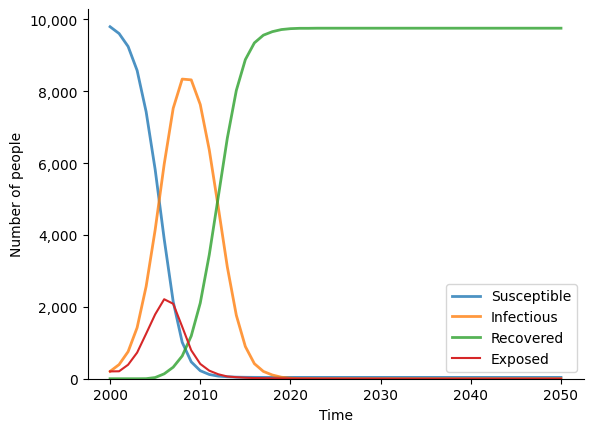

In [4]:
seir = SEIR()
sim = ss.Sim(diseases=seir, networks='random')
sim.run()
# sim.plot()
sim.diseases.seir.plot()

# Now try to get some different parameters into this

Initializing sim with 10000 agents
  Running 2026.07.01 ( 0/154) (0.00 s)  ———————————————————— 1%
  Running 2026.07.11 (10/154) (0.08 s)  •——————————————————— 7%
  Running 2026.07.21 (20/154) (0.19 s)  ••—————————————————— 14%
  Running 2026.07.31 (30/154) (0.26 s)  ••••———————————————— 20%
  Running 2026.08.10 (40/154) (0.36 s)  •••••——————————————— 27%
  Running 2026.08.20 (50/154) (0.46 s)  ••••••—————————————— 33%
  Running 2026.08.30 (60/154) (0.52 s)  •••••••————————————— 40%
  Running 2026.09.09 (70/154) (0.63 s)  •••••••••——————————— 46%
  Running 2026.09.19 (80/154) (0.73 s)  ••••••••••—————————— 53%
  Running 2026.09.29 (90/154) (0.81 s)  •••••••••••————————— 59%
  Running 2026.10.09 (100/154) (0.86 s)  •••••••••••••——————— 66%
  Running 2026.10.19 (110/154) (0.92 s)  ••••••••••••••—————— 72%
  Running 2026.10.29 (120/154) (0.97 s)  •••••••••••••••————— 79%
  Running 2026.11.08 (130/154) (1.05 s)  •••••••••••••••••——— 85%
  Running 2026.11.18 (140/154) (1.13 s)  ••••••••••••

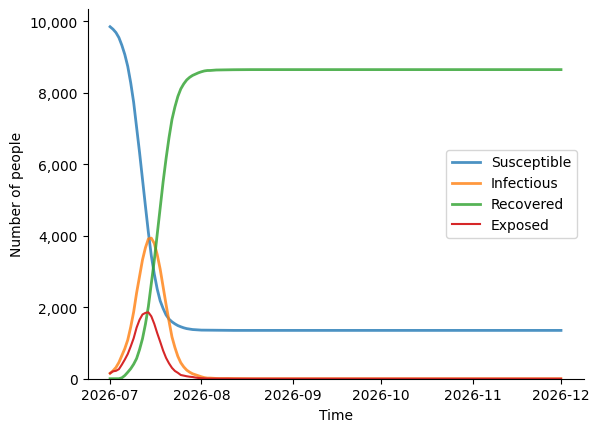

In [5]:
seir = SEIR(
    beta=0.05,      # transmission rate
    dur_exp=2.0,
    dur_inf=5.0,
    p_death=0.0,
    init_prev=0.01
)
sim = ss.Sim(diseases=seir, networks='random', n_agents=10_000, start='2026-07-01', stop='2026-12-01', unit='day')
sim.run()
sim.diseases.seir.plot()

# Plot epidemic curves for 3 different R₀ values (1.2, 2.5, 4.0)
 
The SEIR model typically follows these differential equations:

| Compartment | Description | Mathematical Representation |
|-------------|-------------|----------------------------|
| **S** (Susceptible) | Individuals who can become infected | $\frac{dS}{dt} = -\beta S I / N$ |
| **E** (Exposed) | Infected but not yet infectious | $\frac{dE}{dt} = \beta S I / N - \sigma E$ |
| **I** (Infected) | Infectious individuals | $\frac{dI}{dt} = \sigma E - \gamma I$ |
| **R** (Recovered) | Immune individuals | $\frac{dR}{dt} = \gamma I$ |

where:

- **$\beta$ (beta)**: Transmission rate - controls how easily the disease spreads
- **$\sigma$ (sigma)**: Rate of progression from exposed to infectious = $1/\text{incubation period}$
- **$\gamma$ (gamma)**: Recovery rate = $1/\text{infectious period}$


In this notation, the basic reproduction number $R_0 = \beta / \gamma.$

If I am interpreting correctly, though, `dur_inf` $= 1/\gamma$, so

Initializing sim with 10000 agents
  Running 2026.07.01 ( 0/154) (0.00 s)  ———————————————————— 1%
  Running 2026.07.11 (10/154) (0.11 s)  •——————————————————— 7%
  Running 2026.07.21 (20/154) (0.26 s)  ••—————————————————— 14%
  Running 2026.07.31 (30/154) (0.38 s)  ••••———————————————— 20%
  Running 2026.08.10 (40/154) (0.47 s)  •••••——————————————— 27%
  Running 2026.08.20 (50/154) (0.55 s)  ••••••—————————————— 33%
  Running 2026.08.30 (60/154) (0.67 s)  •••••••————————————— 40%
  Running 2026.09.09 (70/154) (0.92 s)  •••••••••——————————— 46%
  Running 2026.09.19 (80/154) (1.13 s)  ••••••••••—————————— 53%
  Running 2026.09.29 (90/154) (1.24 s)  •••••••••••————————— 59%
  Running 2026.10.09 (100/154) (1.31 s)  •••••••••••••——————— 66%
  Running 2026.10.19 (110/154) (1.41 s)  ••••••••••••••—————— 72%
  Running 2026.10.29 (120/154) (1.47 s)  •••••••••••••••————— 79%
  Running 2026.11.08 (130/154) (1.55 s)  •••••••••••••••••——— 85%
  Running 2026.11.18 (140/154) (1.64 s)  ••••••••••••

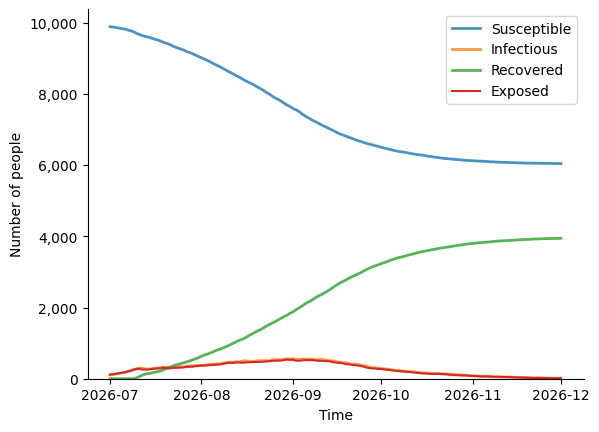

In [6]:
# R_0 of 1.2 could be
seir = SEIR(
    beta=0.012,      # transmission rate
    dur_exp=10,
    dur_inf=10,
    p_death=0.0,
    init_prev=0.01
)
sim = ss.Sim(diseases=seir, networks='random', n_agents=10_000, start='2026-07-01', stop='2026-12-01', unit='day')
sim.run()
sim.diseases.seir.plot()

Initializing sim with 10000 agents
  Running 2026.07.01 ( 0/154) (0.00 s)  ———————————————————— 1%
  Running 2026.07.11 (10/154) (0.07 s)  •——————————————————— 7%
  Running 2026.07.21 (20/154) (0.14 s)  ••—————————————————— 14%
  Running 2026.07.31 (30/154) (0.23 s)  ••••———————————————— 20%
  Running 2026.08.10 (40/154) (0.31 s)  •••••——————————————— 27%
  Running 2026.08.20 (50/154) (0.37 s)  ••••••—————————————— 33%
  Running 2026.08.30 (60/154) (0.43 s)  •••••••————————————— 40%
  Running 2026.09.09 (70/154) (0.50 s)  •••••••••——————————— 46%
  Running 2026.09.19 (80/154) (0.57 s)  ••••••••••—————————— 53%
  Running 2026.09.29 (90/154) (0.63 s)  •••••••••••————————— 59%
  Running 2026.10.09 (100/154) (0.69 s)  •••••••••••••——————— 66%
  Running 2026.10.19 (110/154) (0.77 s)  ••••••••••••••—————— 72%
  Running 2026.10.29 (120/154) (0.97 s)  •••••••••••••••————— 79%
  Running 2026.11.08 (130/154) (1.08 s)  •••••••••••••••••——— 85%
  Running 2026.11.18 (140/154) (1.18 s)  ••••••••••••

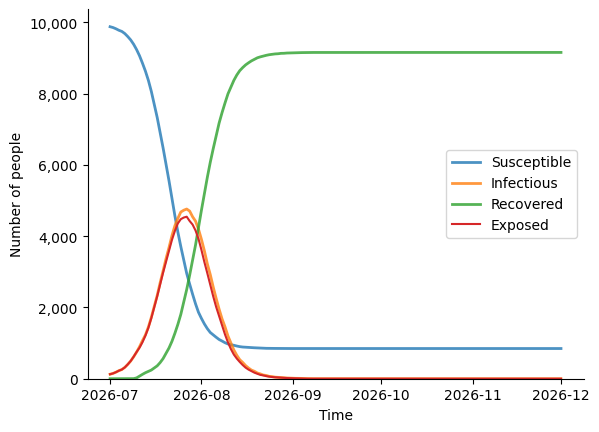

In [7]:
# R_0 of 2.5 could be
seir = SEIR(
    beta=0.025,      # transmission rate
    dur_exp=10,
    dur_inf=10,
    p_death=0.0,
    init_prev=0.01
)
sim = ss.Sim(diseases=seir, networks='random', n_agents=10_000, start='2026-07-01', stop='2026-12-01', unit='day')
sim.run()
sim.diseases.seir.plot()

Initializing sim with 10000 agents
  Running 2026.07.01 ( 0/154) (0.00 s)  ———————————————————— 1%
  Running 2026.07.11 (10/154) (0.09 s)  •——————————————————— 7%
  Running 2026.07.21 (20/154) (0.16 s)  ••—————————————————— 14%
  Running 2026.07.31 (30/154) (0.26 s)  ••••———————————————— 20%
  Running 2026.08.10 (40/154) (0.33 s)  •••••——————————————— 27%
  Running 2026.08.20 (50/154) (0.43 s)  ••••••—————————————— 33%
  Running 2026.08.30 (60/154) (0.49 s)  •••••••————————————— 40%
  Running 2026.09.09 (70/154) (0.56 s)  •••••••••——————————— 46%
  Running 2026.09.19 (80/154) (0.63 s)  ••••••••••—————————— 53%
  Running 2026.09.29 (90/154) (0.69 s)  •••••••••••————————— 59%
  Running 2026.10.09 (100/154) (0.76 s)  •••••••••••••——————— 66%
  Running 2026.10.19 (110/154) (0.81 s)  ••••••••••••••—————— 72%
  Running 2026.10.29 (120/154) (0.86 s)  •••••••••••••••————— 79%
  Running 2026.11.08 (130/154) (0.93 s)  •••••••••••••••••——— 85%
  Running 2026.11.18 (140/154) (1.01 s)  ••••••••••••

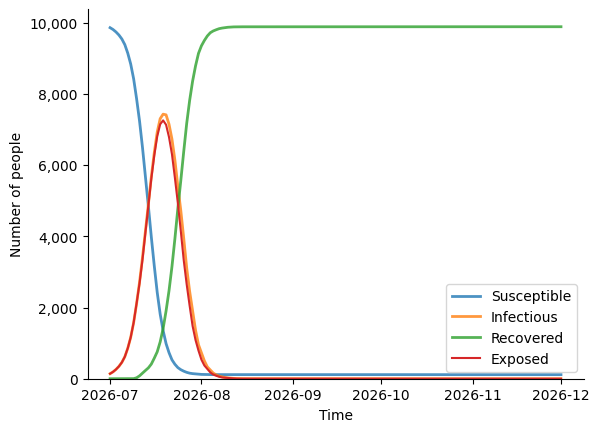

In [8]:
# R_0 of 4.0 could be
seir = SEIR(
    beta=0.040,      # transmission rate
    dur_exp=10,
    dur_inf=10,
    p_death=0.0,
    init_prev=0.01
)
sim = ss.Sim(diseases=seir, networks='random', n_agents=10_000, start='2026-07-01', stop='2026-12-01', unit='day')
sim.run()
sim.diseases.seir.plot()

## I think I'm missing something here, these plots are not quite what I was expecting.

# Calculate peak timing and final attack rate for each scenario

The final attack ratio is the proportion
of the population that gets infected by the end of the epidemic.

In [9]:
sim.results#.seir  # explore what is in the results object

Results(sim)
0. timevec: array(start=2026.07.01, stop=2026.12.01)
1. randomnet: Results(randomnet)
    1.0. timevec: array(start=2026.07.01, stop=2026.12.01)
    1.1. n_edges: Result(min=50000, mean=50000, max=50000)
2. seir: Results(seir)
    2.0. timevec: array(start=2026.07.01, stop=2026.12.01)
    2.1. n_susceptible: Result(min=114, mean=957.416, max=9859)
    2.2. n_infected: Result(min=0, mean=715.162, max=7430)
    2.3. n_recovered: Result(min=0, mean=8368.27, max=9886)
    2.4. n_exposed: Result(min=0, mean=674.468, max=7255)
    2.5. prevalence: Result(min=0, mean=0.0715162, max=0.743)
    2.6. new_infections: Result(min=0, mean=64.1948, max=844)
    2.7. cum_infections: Result(min=0, mean=8400.18, max=9886)
3. n_alive: Result(min=10000, mean=10000, max=10000)
4. new_deaths: Result(min=0, mean=0, max=0)
5. cum_deaths: Result(min=0, mean=0, max=0)

In [10]:
s_infected = pd.Series(sim.results.seir.n_infected, index=sim.results.seir.timevec)  # pd.Series of number infected, indexed by time
s_infected.sort_values(ascending=False).iloc[[0]]  # time and value of time with most infected

2026-07-19    7430.0
dtype: float64

In [11]:
np.round(100 * sim.results.seir.cum_infections / 10_000, 1)  # percent infected over time; when it stops changing that is the final attack rate

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.4,  1.2,
        2. ,  2.6,  3.5,  4.7,  6.6,  8.9, 12.1, 16.4, 21.8, 28.2, 35.3,
       43.5, 51.5, 60. , 68.3, 75. , 81.2, 86. , 89.4, 92.3, 94.4, 95.6,
       96.6, 97.3, 97.8, 98.2, 98.4, 98.6, 98.6, 98.7, 98.8, 98.8, 98.8,
       98.8, 98.8, 98.8, 98.8, 98.8, 98.8, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9,
       98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98.9, 98